<a href="https://colab.research.google.com/github/vazquezsilvana/Entrega-Final-Ciencia-de-Datos-I/blob/main/ProyectoParteIII%2BVazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Ciencia de datos I para la Predicción de la Depresión en profecionales

Este notebook tiene como objetivo desarrollar el análisis de la depresion en profesionales, siguiendo las etapas del análisis de datos para el trabajo final del curso de Data Science I de Coderhouse. El trabajo se centrará en la aplicación de técnicas de reducción de dimensionalidad, la construcción y entrenamiento de un modelo de predicción, la evaluación de su rendimiento mediante métricas, y finalmente, la interpretación de los resultados para generar conclusiones.

# Descripción del Dataset


El análisis se realizará sobre el dataset Depression-Professional-Dataset.csv (provisto por la profesora tutora Silvana Tomsig), que contiene una serie de variables profesionales y personales. El objetivo principal de este proyecto es utilizar estas características para predecir si un individuo padece depresión.




****Nota para mi: ver a que tienden los datos para poder elegir el clasificador.**Por lo tanto, por ahora estaría ante un problema de clasificación binaria, donde el modelo deberá categorizar a los individuos en una de dos clases: con o sin depresión.

Importar librerias y cargar el Dataset

In [85]:
#librerias para el manejo del dataset elegido.
import numpy as np
import pandas as pd

#librerias para los graficos
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


#librerias para el modelo seleccionado
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Se carga el dataset desde el enlace de GitHub, tema: Depresion y se cambia el separador dado el el seleccionado es ";"
url = 'https://raw.githubusercontent.com/vazquezsilvana/Data-Science-I/main/Depression-Professional-Dataset.csv'
df = pd.read_csv(url, sep=";")
df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


# Análisis Exploratorio de Datos (EDA)



*Explorar los datos*

En este caso utilizaremos las siguientes funciones.

df.head(), ver las primeras 5 filas del dataset.

df.info(), ver un resumen del dataset.

df.describe(), generar estadisticas descriptivas para las columnas númericas.


Dataset original

In [86]:
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


Renombrado de columnas

In [87]:
# Se redefine nombres de columna antiguos a los nuevos
nuevos_nombres = {
    'gender': 'Género',
    'age': 'Edad',
    'work pressure': 'Presión laboral',
    'job satisfaction': 'Satisfacción laboral',
    'sleep duration': 'Duración del sueño',
    'dietary habits': 'Hábitos alimenticios',
    'have you ever had suicidal thoughts ?': '¿Ha tenido pensamientos suicidas?',
    'work hours': 'Horas de trabajo',
    'financial stress': 'Estrés financiero',
    'family history of mental illness': 'Antecedentes familiares de enfermedades mentales',
    'depression': 'Depresión'
}

# Lowercase the column names in the DataFrame
df.columns = df.columns.str.lower()

# Renombra las columnas
df.rename(columns=nuevos_nombres, inplace=True)

print("--- DataFrame con las columnas renombradas ---")
print(df.columns)
print("\n")

df.head()

--- DataFrame con las columnas renombradas ---
Index(['Género', 'Edad', 'Presión laboral', 'Satisfacción laboral',
       'Duración del sueño', 'Hábitos alimenticios',
       '¿Ha tenido pensamientos suicidas?', 'Horas de trabajo',
       'Estrés financiero', 'Antecedentes familiares de enfermedades mentales',
       'Depresión'],
      dtype='object')




,Género,Edad,Presión laboral,Satisfacción laboral,Duración del sueño,Hábitos alimenticios,¿Ha tenido pensamientos suicidas?,Horas de trabajo,Estrés financiero,Antecedentes familiares de enfermedades mentales,Depresión
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


Cambio de valores

In [88]:
df['Género'] = df['Género'].replace('Female', 'Femenino')
df['Género'] = df['Género'].replace('Male', 'Masculino')

In [89]:
df ['Hábitos alimenticios'].unique()
reemplazos = {
    'Moderate': 'Moderado',
    'Unhealthy': 'No saludable',
    'Healthy': 'Saludable'
}
df['Hábitos alimenticios'] = df['Hábitos alimenticios'].replace(reemplazos)


In [90]:
reemplazos = {
    'Yes': 'Sí',
    'No': 'No'
}
df['¿Ha tenido pensamientos suicidas?'] = df['¿Ha tenido pensamientos suicidas?'].replace(reemplazos)
df['Antecedentes familiares de enfermedades mentales'] = df['Antecedentes familiares de enfermedades mentales'].replace(reemplazos)
df['Depresión'] = df['Depresión'].replace(reemplazos)

df.head()

,Género,Edad,Presión laboral,Satisfacción laboral,Duración del sueño,Hábitos alimenticios,¿Ha tenido pensamientos suicidas?,Horas de trabajo,Estrés financiero,Antecedentes familiares de enfermedades mentales,Depresión
0,Femenino,37,2.0,4.0,7-8 hours,Moderado,No,6,2,No,No
1,Masculino,60,4.0,3.0,5-6 hours,No saludable,Sí,0,4,Sí,No
2,Femenino,42,2.0,3.0,5-6 hours,Moderado,No,0,2,No,No
3,Femenino,44,3.0,5.0,7-8 hours,Saludable,Sí,1,2,Sí,No
4,Masculino,48,4.0,3.0,7-8 hours,Moderado,Sí,6,5,Sí,No


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Género                                            2054 non-null   object 
 1   Edad                                              2054 non-null   int64  
 2   Presión laboral                                   2054 non-null   float64
 3   Satisfacción laboral                              2054 non-null   float64
 4   Duración del sueño                                2054 non-null   object 
 5   Hábitos alimenticios                              2054 non-null   object 
 6   ¿Ha tenido pensamientos suicidas?                 2054 non-null   object 
 7   Horas de trabajo                                  2054 non-null   int64  
 8   Estrés financiero                                 2054 non-null   int64  
 9   Antecedentes famili

Se descarta valores nulos, vacios, incompletos

In [92]:
df.describe()

,Edad,Presión laboral,Satisfacción laboral,Horas de trabajo,Estrés financiero
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


Identificar los valores:

df.isnull().sum(), para determintar valores nulos (faltantes)

In [93]:
df.isnull().sum()

,0
Género,0
Edad,0
Presión laboral,0
Satisfacción laboral,0
Duración del sueño,0
Hábitos alimenticios,0
¿Ha tenido pensamientos suicidas?,0
Horas de trabajo,0
Estrés financiero,0
Antecedentes familiares de enfermedades mentales,0


Se determina que el dataset que no tiene valores nulos.

# Preguntas e Hipótesis de Interés

Preguntas del problema:

¿Qué factores laborales están asociados con los niveles de depresión en la población profesional estudiada?

¿Es la depresion un factor para tener pensamientos suicida?

¿La combinación de Antecedentes familiares de enfermedades mentales y la depresión aumenta el nivel de tener pensamientos suicida?

Hipótesis 1: Un alto nivel presión laboral, bajo nivel de satisfacción laboral y la cantidad de horas trabajadas se correlaciona con niveles altos de depresión.

Hipotesis 2: La depresión genera pensamientos suicida.


Hipotesis 3: Tener antecedentes de enfermedades mentales y la presencia de depresión aumenta la probabilidad de tener pensamientos suicidas.



# Exploración y Visualizaciones
A continuación, se crearán las visualizaciones y los análisis numéricos para abordar las hipótesis.



# Hipotesis 1

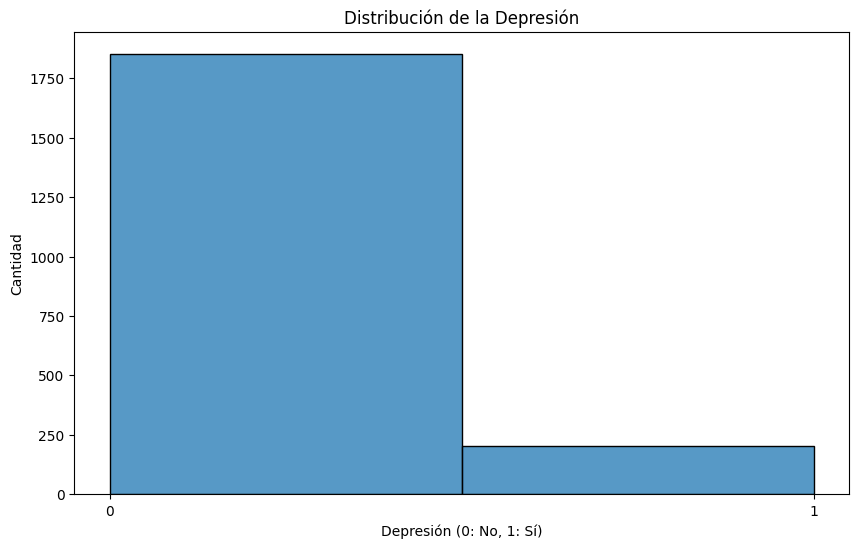


Conteo:
Con_depresión
0    1851
1     203
Name: count, dtype: int64


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Se binariza la variable objetivo (0: sin depresión, 1: con depresión)
df['Con_depresión'] = df['Depresión'].apply(lambda x: 1 if x == 'Sí' else 0)

#  Análisis de la Depresión
plt.figure(figsize=(10, 6))
sns.histplot(df['Con_depresión'], bins=2, kde=False)
plt.title('Distribución de la Depresión')
plt.xlabel('Depresión (0: No, 1: Sí)')
plt.ylabel('Cantidad')
plt.xticks([0, 1])
plt.show()
print("\nConteo:")
print(df['Con_depresión'].value_counts())

Observaciones: De la grafica realizada se puede observar que las personas con depresión son significativamente menores de las que no.

In [95]:
df.head()

,Género,Edad,Presión laboral,Satisfacción laboral,Duración del sueño,Hábitos alimenticios,¿Ha tenido pensamientos suicidas?,Horas de trabajo,Estrés financiero,Antecedentes familiares de enfermedades mentales,Depresión,Con_depresión
0,Femenino,37,2.0,4.0,7-8 hours,Moderado,No,6,2,No,No,0
1,Masculino,60,4.0,3.0,5-6 hours,No saludable,Sí,0,4,Sí,No,0
2,Femenino,42,2.0,3.0,5-6 hours,Moderado,No,0,2,No,No,0
3,Femenino,44,3.0,5.0,7-8 hours,Saludable,Sí,1,2,Sí,No,0
4,Masculino,48,4.0,3.0,7-8 hours,Moderado,Sí,6,5,Sí,No,0


/tmp/ipython-input-585827200.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_depresion = df.groupby(['grupo_edad', 'Depresión']).size().unstack(fill_value=0)


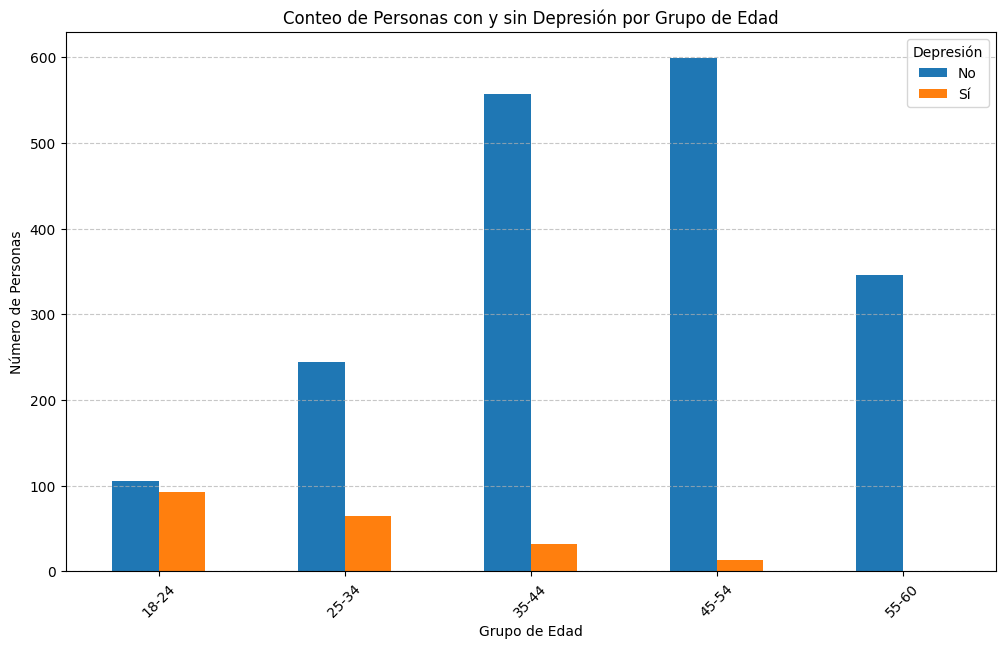

In [96]:
# Define el rango de edad
edad_min = df['Edad'].min()
edad_max = df['Edad'].max()

# Define grupos de edad para el análisis
bins = [edad_min, 25, 35, 45, 55, edad_max + 1]
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]
df['grupo_edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Cuenta el número de personas con y sin depresión por grupo de edad
conteo_depresion = df.groupby(['grupo_edad', 'Depresión']).size().unstack(fill_value=0)

# Se rea un gráfico de barras para visualizar la distribución
conteo_depresion.plot(kind='bar', figsize=(12, 7), rot=45)
plt.title('Conteo de Personas con y sin Depresión por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.legend(title='Depresión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusión sobre la Edad y la Depresión
Según el análisis exploratorio de los datos, se observa que la edad por sí sola no es un factor determinante o la única causa de la depresión. Sin embargo, se ha identificado una mayor presencia de esta condición en personas jóvenes, específicamente en el rango de edad de 18 a 34 años.

Esta observación sugiere que este grupo etario es el más vulnerable dentro de la muestra estudiada. Para la siguiente etapa de este proyecto, se investigará qué factores podrían explicar esta vulnerabilidad. El análisis se centrará en el impacto de las condiciones laborales y el estrés financiero en la presencia de depresión en este grupo.

Además, se explorará la relación entre la depresión y los pensamientos suicidas en estos jóvenes, y se analizará si la presencia de antecedentes familiares de enfermedades mentales aumenta el riesgo de tener dichos pensamientos.

# Relación entre condición de trabajo (Horas trabajadas, satisfacción laboral y presión laboral) y Depresión

/tmp/ipython-input-575669296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depresión', y='Horas de trabajo', data=df, palette='pastel')


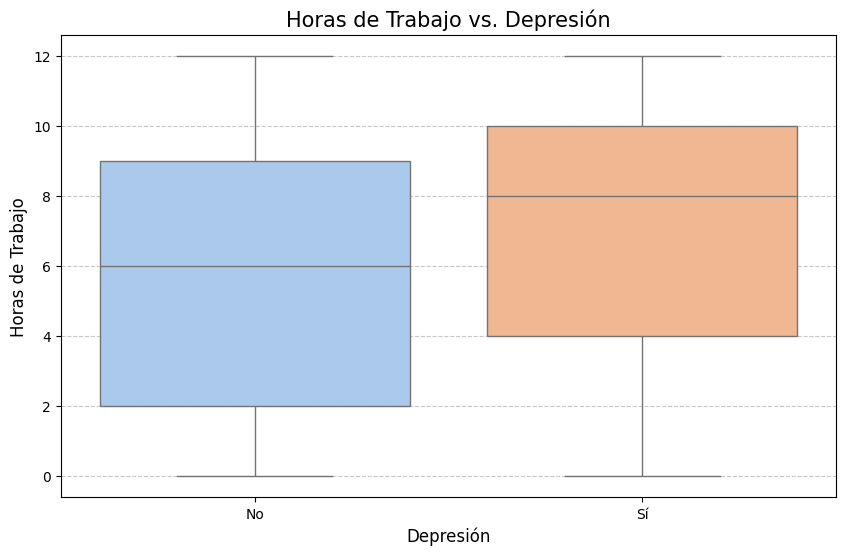

Promedio de Horas de Trabajo por grupo:
Depresión
No    5.770394
Sí    7.394089
Name: Horas de trabajo, dtype: float64


In [97]:
# --- GRÁFICO 1: HORAS DE TRABAJO VS. DEPRESIÓN ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depresión', y='Horas de trabajo', data=df, palette='pastel')
plt.title('Horas de Trabajo vs. Depresión', fontsize=15)
plt.xlabel('Depresión', fontsize=12)
plt.ylabel('Horas de Trabajo', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Promedio de Horas de Trabajo por grupo:")
print(df.groupby('Depresión')['Horas de trabajo'].mean())

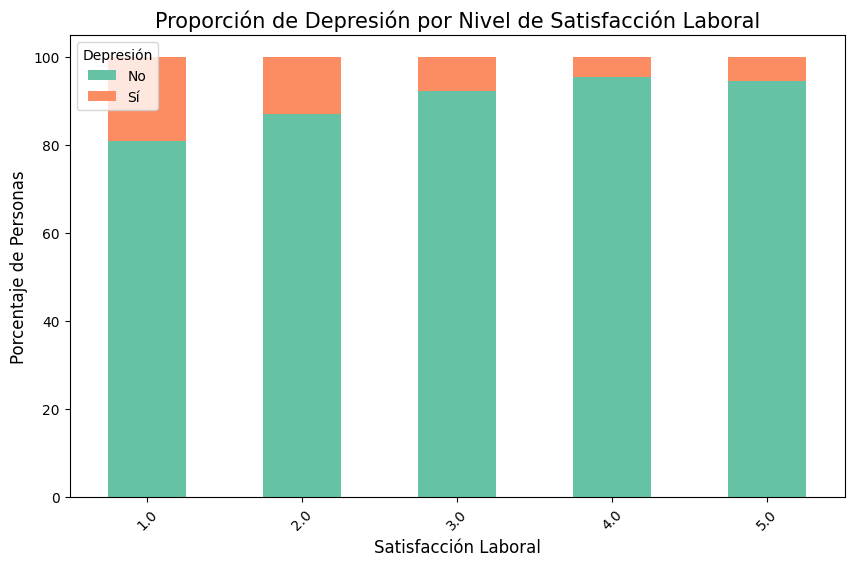

In [98]:

# --- GRÁFICO 2: SATISFACCIÓN LABORAL VS. DEPRESIÓN ---
satisfaccion_depresion = pd.crosstab(df['Satisfacción laboral'], df['Depresión'], normalize='index') * 100
satisfaccion_depresion.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
plt.title('Proporción de Depresión por Nivel de Satisfacción Laboral', fontsize=15)
plt.xlabel('Satisfacción Laboral', fontsize=12)
plt.ylabel('Porcentaje de Personas', fontsize=12)
plt.xticks(rotation=45)
plt.show()



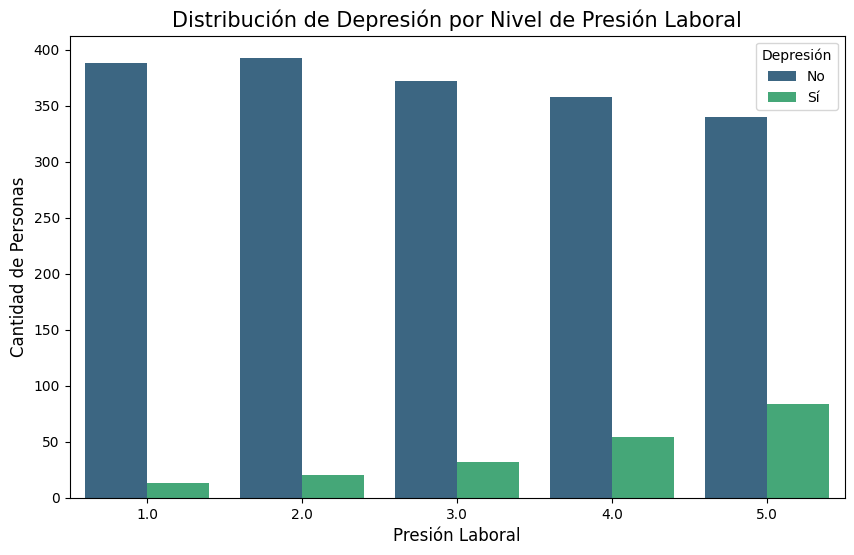

In [99]:
# --- GRÁFICO 3: PRESIÓN LABORAL VS. DEPRESIÓN ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Presión laboral', hue='Depresión', palette='viridis')
plt.title('Distribución de Depresión por Nivel de Presión Laboral', fontsize=15)
plt.xlabel('Presión Laboral', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.show()

El análisis visual de los gráficos sugiere que existe una relación entre los factores laborales y la depresión. Se observa que a mayor cantidad de horas de trabajo y presión laboral, y a menor satisfacción laboral, parece aumentar la probabilidad de sufrir depresión.

# Hipótesis 2

# Relación entre depresión y pensamientos suicidas.

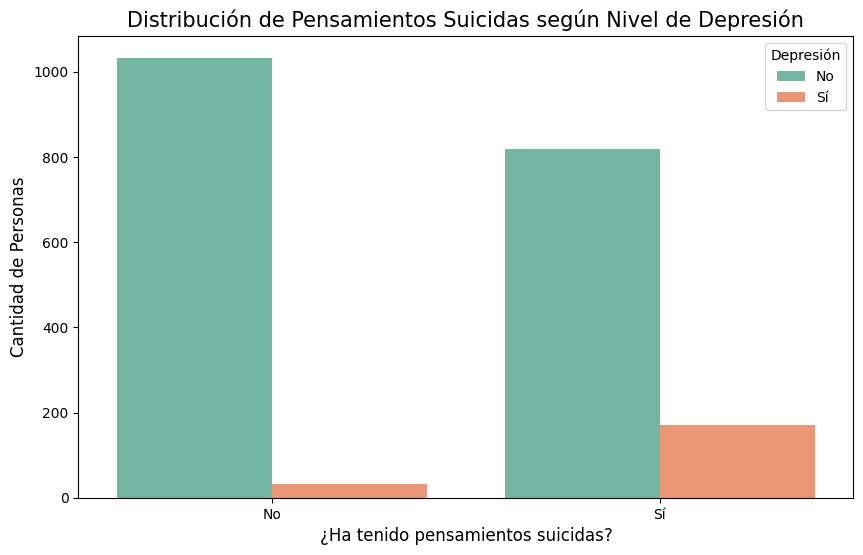

Tabla de conteo:
Depresión                            No   Sí
¿Ha tenido pensamientos suicidas?           
No                                 1033   32
Sí                                  818  171


In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='¿Ha tenido pensamientos suicidas?', hue='Depresión', data=df, palette='Set2')
plt.title('Distribución de Pensamientos Suicidas según Nivel de Depresión', fontsize=15)
plt.xlabel('¿Ha tenido pensamientos suicidas?', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.legend(title='Depresión')
plt.show()

#  verificación numérica
conteo_cruzado = pd.crosstab(df['¿Ha tenido pensamientos suicidas?'], df['Depresión'])
print("Tabla de conteo:")
print(conteo_cruzado)


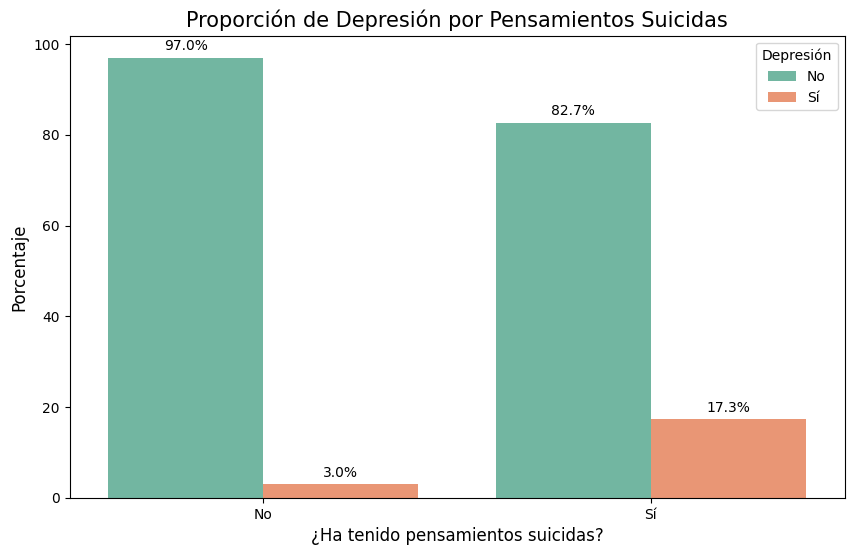

Tabla de porcentajes (normalizada por filas):
Depresión                            No    Sí
¿Ha tenido pensamientos suicidas?            
No                                 97.0   3.0
Sí                                 82.7  17.3


In [101]:
# Dado que si bien el grafico anterior podemos ver que es mayor la cantidad de personas que al tener depresión tienen pensamientos suicidas, necesito verlo en porcentajes.

conteo_suicidio_depresion = pd.crosstab(
    df['¿Ha tenido pensamientos suicidas?'],
    df['Depresión'],
    normalize='index'
) * 100

# Convertir el DataFrame de conteo a un formato largo para usarlo con seaborn
conteo_suicidio_depresion_melt = conteo_suicidio_depresion.reset_index().melt(
    id_vars='¿Ha tenido pensamientos suicidas?',
    var_name='Depresión',
    value_name='Porcentaje'
)

# Se crea el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='¿Ha tenido pensamientos suicidas?',
    y='Porcentaje',
    hue='Depresión',
    data=conteo_suicidio_depresion_melt,
    palette='Set2'
)
plt.title('Proporción de Depresión por Pensamientos Suicidas', fontsize=15)
plt.xlabel('¿Ha tenido pensamientos suicidas?', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Depresión')

# Se agregan las etiquetas de porcentaje a las barras
for container in plt.gca().containers:
    for patch in container:
        height = patch.get_height()
        plt.text(
            patch.get_x() + patch.get_width() / 2.,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.show()

# tabla de datos
print("Tabla de porcentajes (normalizada por filas):")
print(conteo_suicidio_depresion.round(1))

A pesar de que existe una relación entre la depresión y los pensamientos suicidas, el análisis del dataset revela que, para esta muestra específica, la depresión por sí sola no es un predictor determinante. Se observa que solo el 17,3% de las personas con depresión ha reportado haber tenido pensamientos suicidas, lo que sugiere que otros factores, pueden ser más influyentes en esta condición.

# Hipótesis 3

# Relacion entre antecedentes de enfermedades mentales, la presencia de depresión aumenta, pensamientos suicidas.

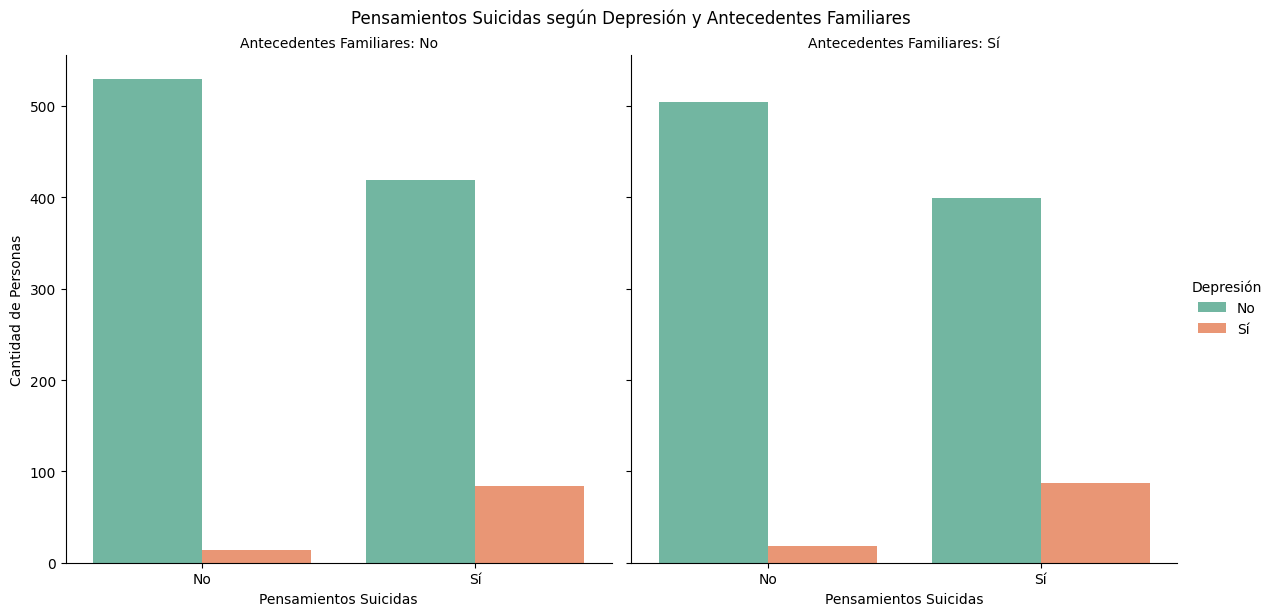

Tabla de Conteo por Antecedentes y Depresión:
¿Ha tenido pensamientos suicidas?                            No   Sí
Antecedentes familiares de enfermedades mentales Depresión          
No                                               No         529  419
                                                 Sí          14   84
Sí                                               No         504  399
                                                 Sí          18   87


In [102]:
g = sns.catplot(
    data=df,
    x='¿Ha tenido pensamientos suicidas?',
    hue='Depresión',
    col='Antecedentes familiares de enfermedades mentales',
    kind='count',
    palette='Set2',
    height=6,
    aspect=1
)

# títulos y etiquetas
g.fig.suptitle('Pensamientos Suicidas según Depresión y Antecedentes Familiares', y=1.02)
g.set_axis_labels("Pensamientos Suicidas", "Cantidad de Personas")
g.set_titles(col_template="Antecedentes Familiares: {col_name}")
plt.show()

#Tabla de conteo
print("Tabla de Conteo por Antecedentes y Depresión:")
conteo = pd.crosstab(
    [df['Antecedentes familiares de enfermedades mentales'], df['Depresión']],
    df['¿Ha tenido pensamientos suicidas?']
)
print(conteo)

Contrario a la hipótesis planteada, el análisis del gráfico de conteo sugiere que la combinación de antecedentes familiares de enfermedades mentales y la presencia de depresión no es un factor concluyente que derive en pensamientos suicidas. Si bien se observa un incremento en los casos de pensamientos suicidas en este grupo, la cantidad no es lo suficientemente significativa como para establecer una causalidad directa.

# Seleccion de modelo


Dado que el problema es de clasificación binaria, usaremos un modelo de clasificación. Se propone Regresión Logística.

In [114]:
seleccionDeCaracteristicas = [
    'Horas de trabajo',
    'Presión laboral',
    'Satisfacción laboral',
    'Estrés financiero',
    'Duración del sueño',
    'Hábitos alimenticios'
]

# Identificado las columnas categóricas
columnasCategorias = [col for col in seleccionDeCaracteristicas if df[col].dtype == 'object']

# Identificando las columnas numéricas
comumasNumericas = [col for col in seleccionDeCaracteristicas if df[col].dtype != 'object']

# Separando las características (X) y la variable objetivo (y)
X = df[seleccionDeCaracteristicas]
Y_Seleccionada = df['Depresión'].apply(lambda x: 1 if x == 'Sí' else 0)

# Aplicando One-Hot Encoding a las columnas categóricas seleccionadas
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
caracteristicasCodificadas = ohe.fit_transform(X[columnasCategorias])

# Convierto a DataFrame y uno con las columnas numéricas
encoded_df = pd.DataFrame(caracteristicasCodificadas, columns=ohe.get_feature_names_out(columnasCategorias))
X_Seleccionada = pd.concat([X[comumasNumericas].reset_index(drop=True), encoded_df], axis=1)

print("Características seleccionadas para el modelo:")
print(X_Seleccionada.columns)

Características seleccionadas para el modelo:
Index(['Horas de trabajo', 'Presión laboral', 'Satisfacción laboral',
       'Estrés financiero', 'Duración del sueño_5-6 hours',
       'Duración del sueño_7-8 hours', 'Duración del sueño_Less than 5 hours',
       'Duración del sueño_More than 8 hours', 'Hábitos alimenticios_Moderado',
       'Hábitos alimenticios_No saludable', 'Hábitos alimenticios_Saludable'],
      dtype='object')


# Paso II: Entrenamiento del Modelo

In [115]:
# Divido los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_Seleccionada,
    Y_Seleccionada,
    test_size=0.2,
    random_state=42,
    # 'stratify' es crucial para mantener la proporción de las clases
    stratify=Y_Seleccionada
)

# Creación de una instancia del modelo de Regresión Logística
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Entrenamos el modelo
log_reg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = log_reg_model.predict(X_test)

# Paso II: Validación del Modelo

Métricas de Rendimiento del Modelo de Regresión Logística:
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Accuracy (Exactitud): 0.9051

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       370
           1       0.62      0.12      0.20        41

    accuracy                           0.91       411
   macro avg       0.77      0.56      0.58       411
weighted avg       0.88      0.91      0.88       411



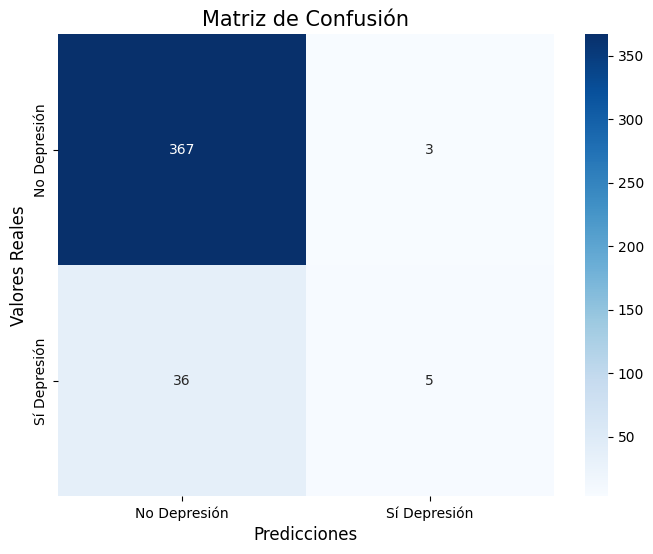

In [116]:
print("Métricas de Rendimiento del Modelo de Regresión Logística:")
print("-*" * 50)
print(f"Accuracy (Exactitud): {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depresión', 'Sí Depresión'],
            yticklabels=['No Depresión', 'Sí Depresión'])
plt.title('Matriz de Confusión', fontsize=15)
plt.ylabel('Valores Reales', fontsize=12)
plt.xlabel('Predicciones', fontsize=12)
plt.show()